In [31]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("sales.csv",parse_dates = ["Date"])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
df.shape

(6435, 8)

In [6]:
df.columns.tolist()

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst = True)

In [10]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [11]:
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5787,41,2011-05-20,1244542.33,0,41.11,3.828,192.831317,6.934
2737,20,2010-06-25,1973135.87,0,75.17,2.808,204.567546,7.856
3381,24,2011-11-11,1425078.59,0,46.78,3.719,136.461806,8.454
2927,21,2011-05-20,744836.56,0,68.36,3.907,215.383478,7.931
1445,11,2010-05-21,1271646.62,0,76.97,2.826,213.911689,7.343
1366,10,2011-08-12,1917397.63,0,85.61,3.794,129.201581,8.257
3708,26,2012-08-24,1022704.20,0,62.08,3.874,138.281452,7.405
6064,43,2011-03-18,635171.05,0,68.98,3.488,206.225924,10.398
4337,31,2010-12-31,1198071.60,1,47.19,2.943,211.064774,8.163
1775,13,2011-03-25,1807545.43,0,42.38,3.435,128.616064,7.470


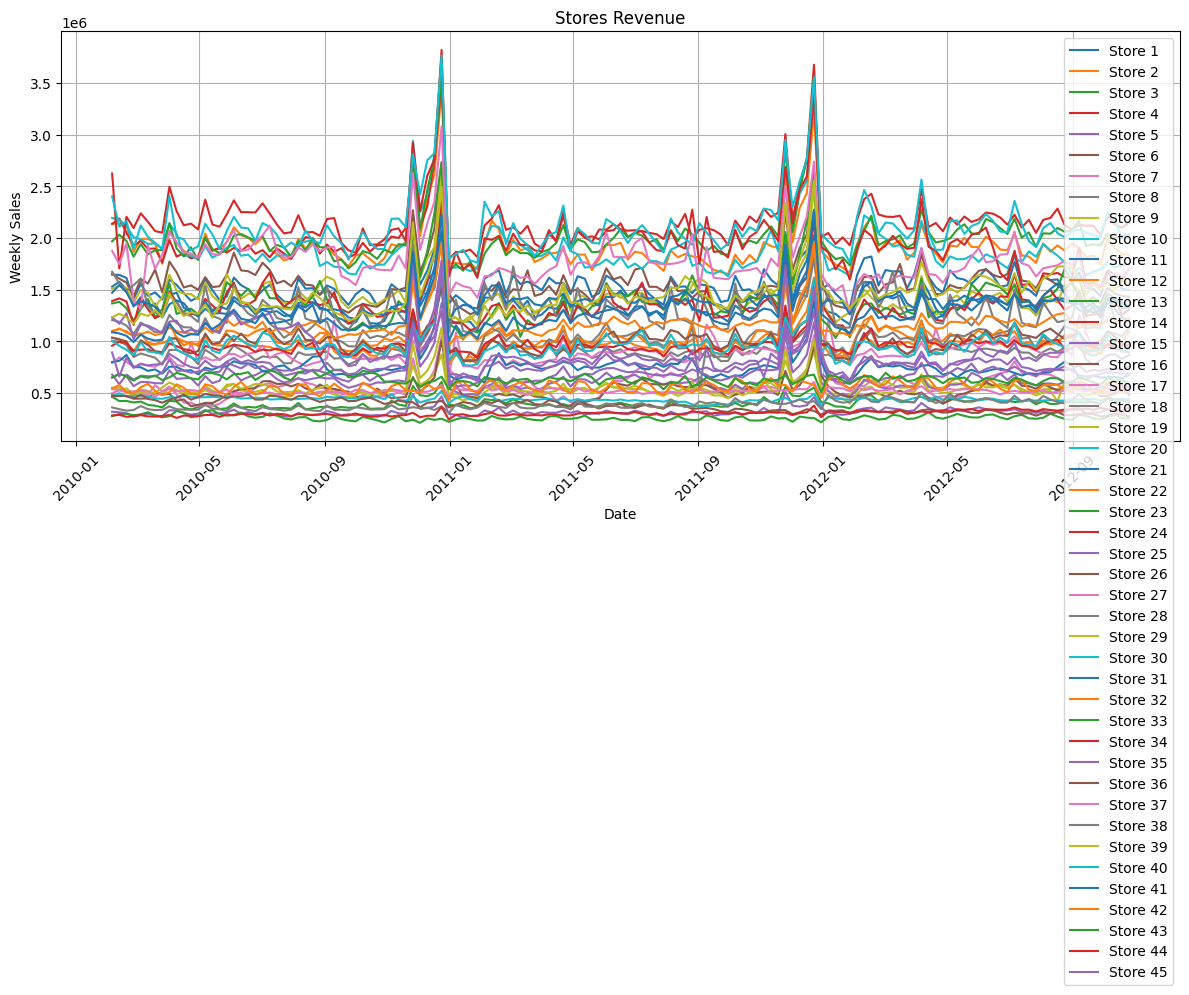

In [12]:
plt.figure(figsize = (12,8))
for i, val in df.groupby("Store"):
    plt.plot(val["Date"],val["Weekly_Sales"],label = f"Store {i}")
    
plt.title("Stores Revenue")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

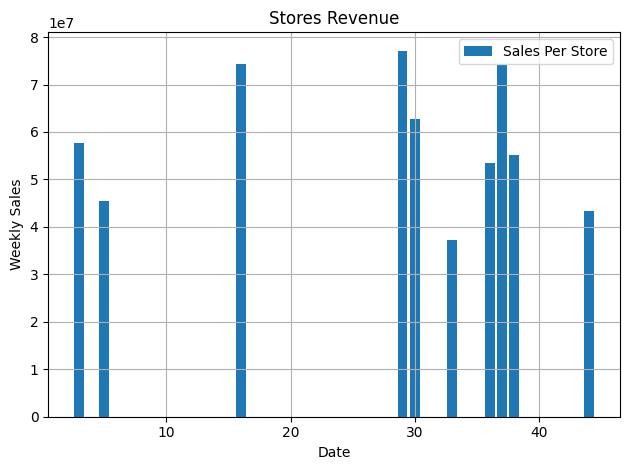

In [13]:
sales_per_store = df.groupby("Store")['Weekly_Sales'].sum().round()
sales_per_store = sales_per_store.sort_values(ascending = True).reset_index('Store').head(10)
sales_per_store

plt.bar(sales_per_store["Store"],sales_per_store["Weekly_Sales"],label = "Sales Per Store")
plt.title("Stores Revenue")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.legend()

In [14]:
holiday_boost = df.groupby("Holiday_Flag")["Weekly_Sales"].mean().round()
holiday_boost

Holiday_Flag
0    1041256.0
1    1122888.0
Name: Weekly_Sales, dtype: float64

<BarContainer object of 2 artists>

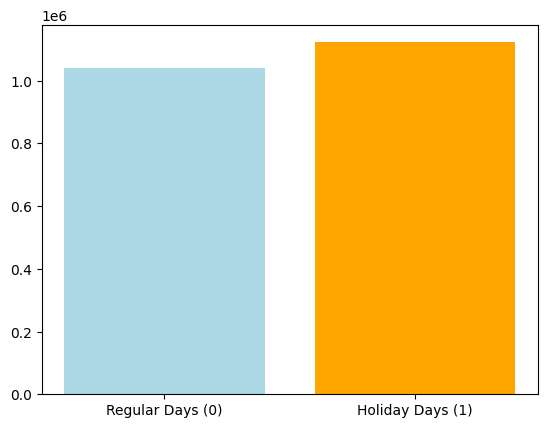

In [15]:
plt.bar(["Regular Days (0)", "Holiday Days (1)"],holiday_boost.values,color=['lightblue', 'orange'])

In [16]:
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2571,18,2012-10-12,1074079.00,0,50.97,4.029,138.911700,8.243
5079,36,2011-07-08,377464.62,0,84.71,3.440,214.024556,8.177
243,2,2012-01-06,1799520.14,0,46.75,3.157,219.355063,7.057
5178,37,2010-09-03,510427.53,0,82.29,2.577,210.296663,8.360
1415,10,2012-07-20,1869967.03,0,84.45,3.589,130.701290,7.170
2227,16,2011-09-02,580805.33,0,63.44,3.511,194.509211,6.338
3712,26,2012-09-21,961084.08,0,52.68,4.056,138.653400,7.405
85,1,2011-09-23,1380020.27,0,75.80,3.467,216.375825,7.962
1697,12,2012-06-22,981386.25,0,91.61,4.014,130.792900,11.627
3378,24,2011-10-21,1283563.43,0,56.60,3.757,136.501774,8.454


In [17]:
store1 = df[df["Store"] == 1]

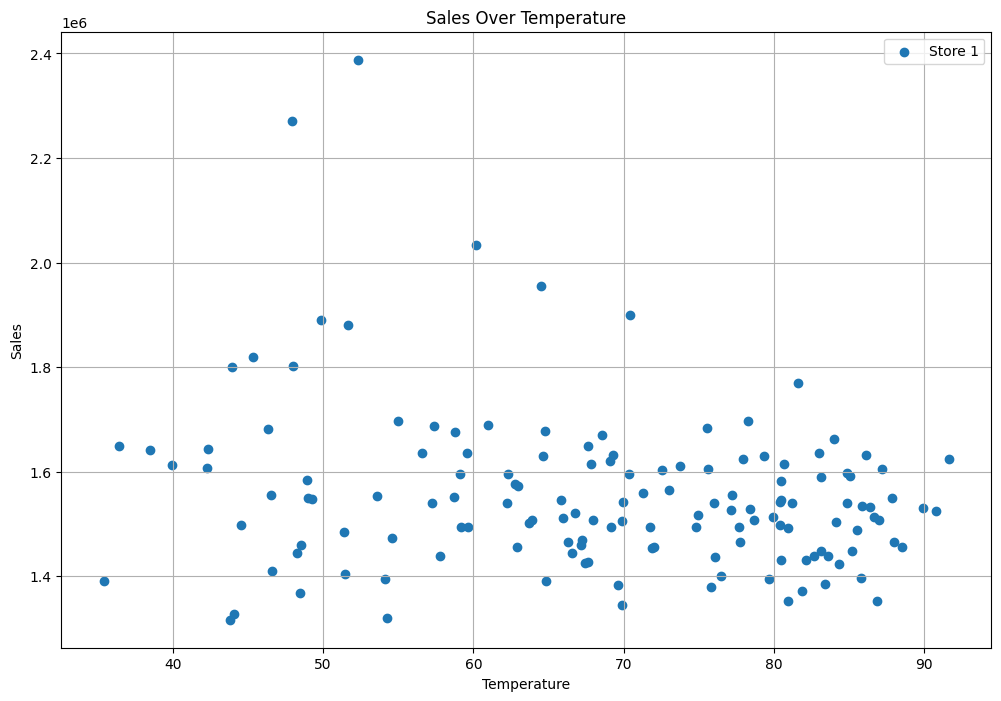

In [18]:
plt.figure(figsize = (12,8))
plt.scatter(store1["Temperature"],store1["Weekly_Sales"],label = f"Store 1")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("Sales Over Temperature")
plt.grid(True)

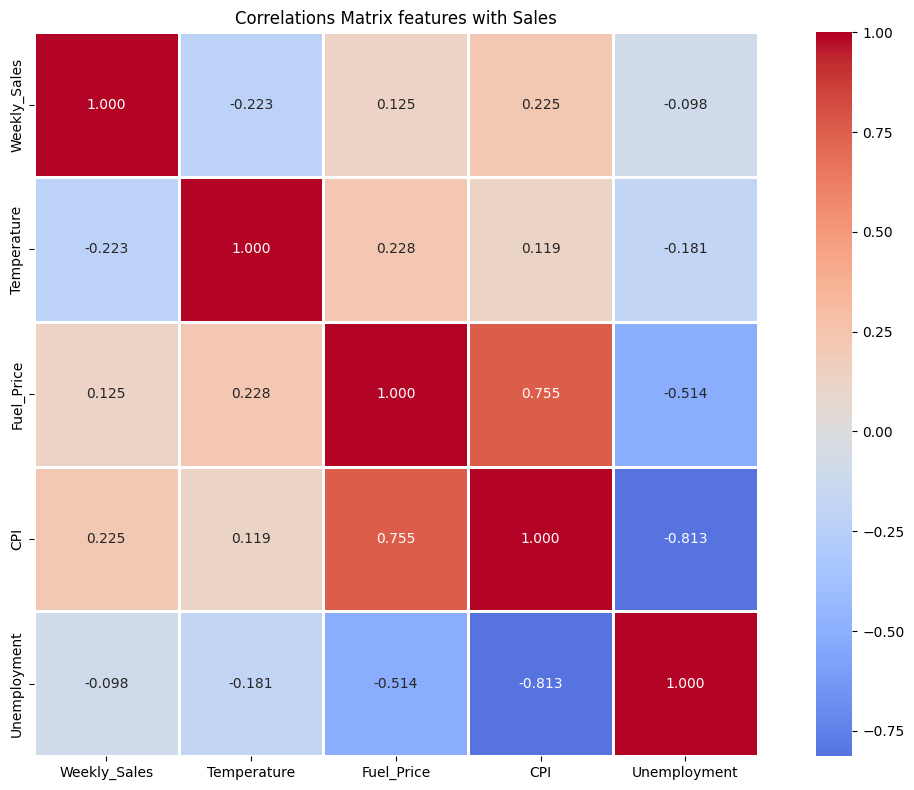

In [46]:
features = store1[["Weekly_Sales",'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
corr_matrix = features.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix,
            annot = True, # show numbers
            cmap = "coolwarm",# color code
            center = 0,# white = zero corr
            square = True,# rec-> squ
            fmt = '.3f',#  decimal to 3
            linewidths = 1) # box gap
plt.title("Correlations Matrix features with Sales")
plt.tight_layout()
plt.savefig("Correlation Matrix features.png")

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

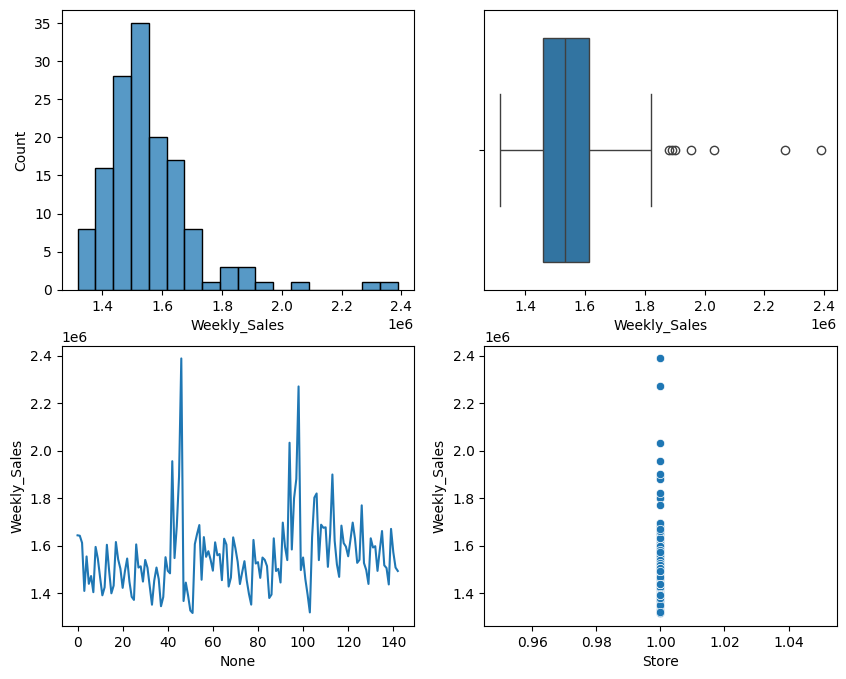

In [50]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(store1["Weekly_Sales"], ax=axes[0, 0])
sns.boxplot(x=store1["Weekly_Sales"], ax=axes[0, 1])
sns.lineplot(x=store1.index, y=store1["Weekly_Sales"], ax=axes[1, 0])
sns.scatterplot(x=store1["Store"], y=store1["Weekly_Sales"], ax=axes[1, 1])